In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

# 数据清洗


In [100]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [3]:
y_train=df_train.pop('SalePrice')  #删除并返回数据集中SalePrice标签列

In [4]:
all_df=pd.concat((df_train,df_test),axis=0) #要处理的整体数据集

In [103]:
all_df.shape

(2919, 80)

### *缺失值处理*

In [5]:
total=all_df.isnull().sum().sort_values(ascending=False)  #每列缺失数量

In [6]:
percent=(all_df.isnull().sum()/len(all_df)).sort_values(ascending=False) #每列缺失率

In [9]:
miss_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
miss_data

,total,percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


##### 1.除去缺失率达40%以上的 (不除去的话，补齐数据误差偏大)

In [10]:
all_df=all_df.drop(miss_data[miss_data['percent']>0.4].index,axis=1)

In [11]:
all_df.shape

(2919, 75)

##### 2.由于有些房子没有车库，造成车库相关的属性缺失，对于这种情况，我们有missing填充，同时对于车库建造时间的缺失，我们用1900填充，表示车库是年久的，使其变得不重要。

In [12]:
garage_obj=['GarageType','GarageFinish','GarageQual','GarageCond']
for garage in garage_obj:
    all_df[garage].fillna('missing',inplace=True)

In [13]:
all_df[garage_obj].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [14]:
all_df['GarageType'].unique()  #missing标签已经填入

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'missing', 'Basment',
       '2Types'], dtype=object)

In [15]:
all_df['GarageYrBlt'].fillna(1900.,inplace=True) #把1900标签填入空缺处表示年代久远

#### *3.装修类中，装修类型为空的表示没装修过，用missing表示；装修面积为0；*

In [16]:
all_df['MasVnrType'].fillna('missing',inplace=True)  #用missing标签表示没装修过
all_df['MasVnrArea'].fillna(0,inplace=True)   #用0表示没装修过的装修面积

In [17]:
(all_df.isnull().sum()/len(all_df)).sort_values(ascending=False) #再次查看数据缺失率，最高为0.16，是LotFrontage列

LotFrontage      0.166495
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MSZoning         0.001370
Functional       0.000685
BsmtFullBath     0.000685
BsmtHalfBath     0.000685
Utilities        0.000685
BsmtFinSF1       0.000343
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
SaleType         0.000343
Electrical       0.000343
Exterior2nd      0.000343
Exterior1st      0.000343
TotalBsmtSF      0.000343
KitchenQual      0.000343
GarageCars       0.000343
GarageArea       0.000343
Neighborhood     0.000000
MSSubClass       0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
                   ...   
SaleCondition    0.000000
Heating          0.000000
GarageFinish     0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch 

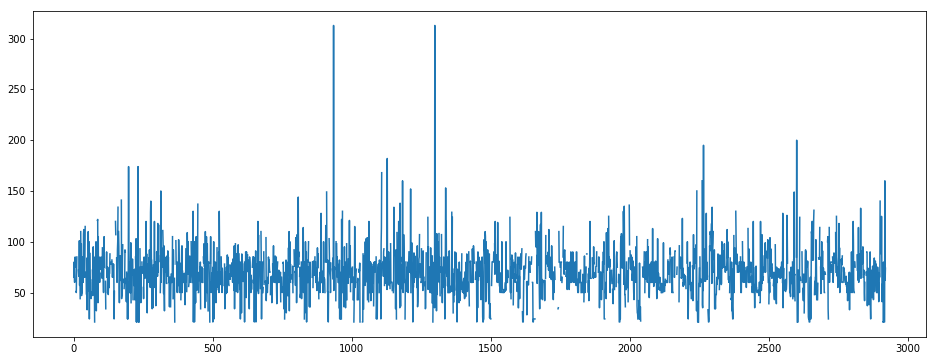

In [18]:
plt.figure(figsize=(16,6))       #从图中看出LotFrontage分布较均匀，可以用均值补齐缺失值，
plt.plot(all_df['Id'],all_df['LotFrontage'])

In [19]:
all_df['LotFrontage'].fillna(all_df['LotFrontage'].mean(),inplace=True) 

In [20]:
#还有部分少量的缺失值，不是很重要，可以用one-hotd转变离散值，然后均值补齐
all_dummies_df=pd.get_dummies(all_df)

In [21]:
mean_col=all_dummies_df.mean()
all_dummies_df.fillna(mean_col,inplace=True)
all_dummies_df.isnull().sum().sum()         #缺失值处理完成

0

###  *数值转换*

In [22]:
#找出类型为数值的所有列，进行标准化处理
all_dummies_df['Id']=all_dummies_df['Id'].astype(str)
a=all_dummies_df.columns[all_dummies_df.dtypes=='int64']
b=all_dummies_df.columns[all_dummies_df.dtypes=='float64']
a,b

(Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
       dtype='object'),
 Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea'],
       dtype='object'))

In [23]:
a_mean=all_dummies_df.loc[:,a].mean()
a_std=all_dummies_df.loc[:,a].std()
all_dummies_df.loc[:,a]=(all_dummies_df.loc[:,a]-a_mean)/a_std
b_mean=all_dummies_df.loc[:,b].mean()
b_std=all_dummies_df.loc[:,b].std()
all_dummies_df.loc[:,b]=(all_dummies_df.loc[:,b]-b_mean)/b_std

In [24]:
all_dummies_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.067320,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.528944,0.580807,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.873466,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.566919,1.177910,...,0,0,0,1,0,0,0,0,1,0
2,3,0.067320,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.338845,0.097856,...,0,0,0,1,0,0,0,0,1,0
3,4,0.302516,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.566919,-0.494856,...,0,0,0,1,1,0,0,0,0,0
4,5,0.067320,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.389978,0.468851,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df_train1=all_dummies_df.iloc[:1460,:]     #处理后的训练集(不含Saleprice)

In [26]:
df_train_train=df_train1.iloc[0:int(0.8*len(df_train1)),:]  #train中的训练集(不含Saleprice)
df_train_test=df_train1.iloc[int(0.8*len(df_train1)):,:]    #train中的测试集(不含Saleprice)

In [27]:
df_train_train_y=y_train.iloc[0:int(0.8*len(y_train))]     #train中训练集的target
df_train_test_y=y_train.iloc[int(0.8*len(df_train1)):]     #train中测试集的target

In [68]:
df_test1=all_dummies_df.iloc[1460:,:]    #处理后的测试集

In [29]:
len(df_train1),len(y_train)

(1460, 1460)

# 建模

分析，显然是回归问题，解决回归问题的方法：SGD、lasso、岭回归

### 1.岭回归
这里要用的特征较多，适合岭回归进行建模，把所有特征放进去就行，无需进行特征选取

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [31]:
alphas=np.logspace(-2,2,50)
test_scores1=[]
test_scores2=[]
for alpha in alphas:
    clf=Ridge(alpha)
    scores1=np.sqrt(cross_val_score(clf,df_train_train,df_train_train_y,cv=5))
    scores2=np.sqrt(cross_val_score(clf,df_train_train,df_train_train_y,cv=10))
    test_scores1.append(1-np.mean(scores1))
    test_scores2.append(1-np.mean(scores2))

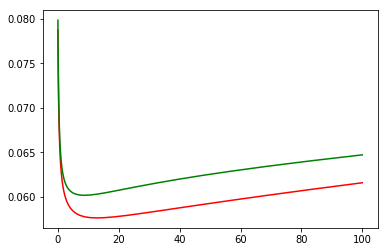

In [32]:
%matplotlib inline
plt.plot(alphas,test_scores1,color='red')   #交叉验证k为5时，误差最小

plt.plot(alphas,test_scores2,color='green')

>当alpha在0~10之间时，整体结构风险最小。（猜测可能在alpha=5时最小

In [33]:
ridge=Ridge(alpha=5)
ridge.fit(df_train_train,df_train_train_y)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
list(ridge.predict(df_train_test))

[201370.8014658473,
 474827.1179832233,
 130635.73221387347,
 168295.32774328237,
 160054.8745386327,
 266117.81951921154,
 228254.50423637335,
 315340.8561641162,
 116138.41278694436,
 105786.76494996434,
 133441.8334865771,
 88579.00157278741,
 242847.5723843106,
 299479.9469128229,
 486574.96575267846,
 150614.96668958056,
 205233.45139306478,
 119902.30431474706,
 57926.489876851876,
 274292.3462132267,
 183854.66181560274,
 192344.04342346435,
 198466.26348782313,
 177487.75546293517,
 129994.30865913411,
 159603.49275695445,
 156139.04631040964,
 167396.5126641174,
 233465.0447601403,
 149002.91538810582,
 177300.568911265,
 137697.95346624442,
 88360.22515886936,
 195630.85014816799,
 139329.72888726115,
 195376.67508062584,
 142884.96328085443,
 265719.6546402073,
 119424.4734279812,
 216033.3537259321,
 140871.2553788422,
 308893.85127384146,
 207467.14688296948,
 207672.0313900303,
 64332.84698800795,
 141967.5980023888,
 122398.15033534421,
 109602.89397366955,
 119827.46510

In [36]:
(((df_train_test_y-ridge.predict(df_train_test))**2).sum())/len(df_train_test_y) #用均方误差来判断模型好坏，结果越小越好

1983899445.438339

### 2.随机森林

>随机森林也可预测回归，对处理高维度效果较好，不要特征选择

In [39]:
#调参
from sklearn.ensemble import RandomForestRegressor
max_features=[.1,.2,.3,.4,.5,.6,.7,.8,.9]
test_score=[]
for max_feature in max_features:
    clf=RandomForestRegressor(max_features=max_feature,n_estimators=100)
    score=np.sqrt(cross_val_score(clf,df_train_train,df_train_train_y,cv=5))
    test_score.append(1-np.mean(score))

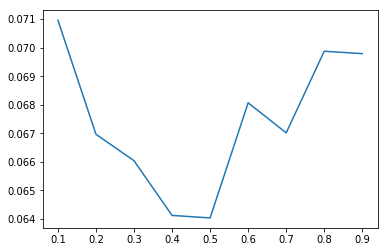

In [40]:
plt.plot(max_features,test_score) #得出误差得分图

>通过图可知，当max_features最大特征数为0.5时，误差最小，所以代入max_feature=0.5

In [43]:
rf=RandomForestRegressor(max_features=0.5,n_estimators=100)
rf.fit(df_train_train,df_train_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
(((df_train_test_y-rf.predict(df_train_test))**2).sum())/len(df_train_test_y) #用均方误差来判断模型好坏，结果越小越好

1108361750.5652797

### 集成学习
>用Bagging（bootstrap aggregatin）集成框架来对岭回归进行融合计算

In [46]:
from sklearn.ensemble import BaggingRegressor

In [51]:
#调参，寻找合适模型数量
ridge=Ridge(5)
params=[10,20,30,40,50,60,70,80,90,100]
test_scores=[]
for param in params:
    clf=BaggingRegressor(n_estimators=param,base_estimator=ridge)
    score=np.sqrt(cross_val_score(clf,df_train_train,df_train_train_y,cv=5))
    test_scores.append(1-np.mean(score))

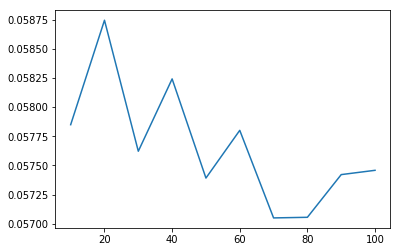

In [52]:
plt.plot(params,test_scores)

>当训练的模型个数为70时，数据误差最小

In [53]:
#调参，寻找合适最大特征数
max_features=[.1,.2,.3,.4,.5,.6,.7,.8,.9]
test_scores=[]
for max_feature in max_features:
    clf=BaggingRegressor(n_estimators=70,base_estimator=ridge,max_features=max_feature)
    score=np.sqrt(cross_val_score(clf,df_train_train,df_train_train_y,cv=5))
    test_scores.append(1-np.mean(score))
    

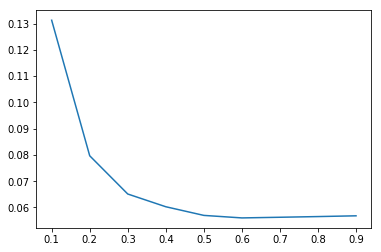

In [54]:
plt.plot(max_features,test_scores)

>最大特征数为0.6时，误差最小

In [63]:
Bagging=BaggingRegressor(n_estimators=70,base_estimator=ridge,max_features=0.6)
Bagging.fit(df_train_train,df_train_train_y)

BaggingRegressor(base_estimator=Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=0.6,
         max_samples=1.0, n_estimators=70, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [64]:
(((df_train_test_y-Bagging.predict(df_train_test))**2).sum())/len(df_train_test_y) #用均方误差来判断模型好坏，结果越小越好

1960180964.6378567

# 结果：

>### 分析结果：三个结果，取均方误差最小的*随机森林*算法

In [67]:
#用训练好的rf来预测数据
rf_percent=rf.predict(df_test1)

In [71]:
result_rf=pd.DataFrame({'Id':df_test1['Id'],'SalePrice':rf_percent})
result_rf.to_csv('result_rf.csv',index=False)